Welcome to a competition powered by AutoDSC for Data Science Challenges! By Prof. Manoel Gadi!

PLEASE DO NOT RENAME THIS FILE!


Simply run this code and start competing today in the competion: 6aQ6IxU7Va

6aQ6IxU7Va details:
 - Description / Descripción: FRAUD MODELLING CHALLENGE - Predict which Credit Card Application is legitimate and which belongs to a fraudster instead.
 - Maximum number of daily attempts / Número máximo de intentos diarios: 10000
 - Creation date / Fecha de creación: 2020-06-10 11:36:52
 - Starting date / Fecha de inicio: 2021-05-12 12:00:00
 - Ending date / Fecha de fin: 2021-05-30 23:59:00
 - Minimum time between prediction submissions / Tiempo mínimo entre envíos de predicciones: 30

Of couse, to win the competition you should improve the starting model! So let's get to work!


In [2]:
print ("IMPORTING LIBRARIES...")
import pandas as pd
import numpy as np

IMPORTING LIBRARIES...


In [3]:
print ("LOADING DATASETS...")
try: # reading train csv from local file
    df_train = pd.read_csv("mfalonso__6aQ6IxU7Va__train.csv")
    df_train.head()
except: # reading train csv from the internet if it is the first time
    import urllib
    csv_train = urllib.request.urlopen("http://manoelutad.pythonanywhere.com/static/uploads/mfalonso__6aQ6IxU7Va__train.csv")
    csv_train_content = csv_train.read()
    with open("mfalonso__6aQ6IxU7Va__train.csv", 'wb') as f:
            f.write(csv_train_content)
    df_train = pd.read_csv("mfalonso__6aQ6IxU7Va__train.csv")

    
try: # reading test csv from local file
    df_test = pd.read_csv("mfalonso__6aQ6IxU7Va__test.csv")
    df_test.head()
except: # reading test csv from the internet if it is the first time
    import urllib
    csv_test = urllib.request.urlopen("http://manoelutad.pythonanywhere.com/static/uploads/mfalonso__6aQ6IxU7Va__test.csv")
    csv_test_content = csv_test.read()
    with open("mfalonso__6aQ6IxU7Va__test.csv", 'wb') as f:
            f.write(csv_test_content)
    df_test = pd.read_csv("mfalonso__6aQ6IxU7Va__test.csv")


LOADING DATASETS...


In [2]:
df_train.head()

,Unnamed: 0,id,ib_var_1,ib_var_2,ib_var_3,ib_var_4,ib_var_5,ib_var_6,ib_var_7,ib_var_8,...,if_var_73,if_var_74,if_var_75,if_var_76,if_var_77,if_var_78,if_var_79,if_var_80,if_var_81,ob_target
0,0,1,0,1,0,0,1,1,0,0,...,0.800,0,6,5,0.500000,9.4634,5140.0,0.766667,1,0
1,1,2,0,1,0,0,0,1,0,0,...,0.925,5,8,5,0.400000,7.6341,2570.0,0.700000,4,0
2,2,3,0,0,0,0,1,1,0,0,...,0.800,3,10,6,0.700000,11.1707,5140.0,0.666667,2,0
3,3,4,0,1,0,1,1,1,0,0,...,0.825,5,5,6,0.433333,8.0488,1028.0,0.766667,3,0
4,4,5,0,0,0,0,0,1,0,0,...,0.800,0,11,5,0.700000,5.5854,5140.0,0.733333,3,0


In [3]:
df_test.head()

,Unnamed: 0,id,ib_var_1,ib_var_2,ib_var_3,ib_var_4,ib_var_5,ib_var_6,ib_var_7,ib_var_8,...,if_var_73,if_var_74,if_var_75,if_var_76,if_var_77,if_var_78,if_var_79,if_var_80,if_var_81,contract_date
0,0,1,0,1,0,0,1,0,0,0,...,0.775,1.0,10.0,11.0,0.666667,NaN,5140.000000,0.666667,3,20-Sep-12
1,1,2,1,0,0,0,1,1,0,0,...,0.750,0.0,8.0,10.0,0.600000,12.9024,5140.000000,0.733333,0,24-Sep-12
2,2,3,0,0,0,0,1,1,0,0,...,0.725,0.0,8.0,6.0,0.700000,NaN,2570.000000,0.766667,1,19-Sep-12
3,3,4,0,1,0,1,1,1,0,0,...,0.925,2.0,7.0,5.0,0.566667,15.5366,2056.000000,0.833333,0,20-Sep-12
4,4,5,1,0,0,1,1,1,0,0,...,0.925,0.0,10.0,7.0,0.333333,17.8293,4728.799805,0.633333,2,25-Sep-12


## 1. EDA

In [4]:
def get_info(df): 
    print("BASIC EDA")
    pd.set_option("precision", 3) # Change precision of float numbers to 3 digits
    df_info = pd.DataFrame(df.dtypes)
    df_info["missing"] = df.isnull().sum()
    df_info["NAN"] = df.isna().sum()
    df_info["unique"] = df.nunique()
    df_info["count"] = df.count()
    df_info["min"] = df.min()
    df_info["max"] = df.max()
    df_info["mean"] = df.mean()
    df_info["median"] = df.median()
    df_info["stdev"] = df.std()
    pd.set_option('display.max_rows', df_info.shape[0]+1)
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    return df_info
    #pd.reset_option('display.max_rows')

get_info(df_train)

BASIC EDA


,0,missing,NAN,unique,count,min,max,mean,median,stdev
Unnamed: 0,int64,0,0,864,864,0.000,863.000,431.500,431.500,249.560
id,int64,0,0,864,864,1.000,864.000,432.500,432.500,249.560
ib_var_1,int64,0,0,2,864,0.000,1.000,0.086,0.000,0.280
ib_var_2,int64,0,0,2,864,0.000,1.000,0.581,1.000,0.494
ib_var_3,int64,0,0,2,864,0.000,1.000,0.010,0.000,0.102
ib_var_4,int64,0,0,2,864,0.000,1.000,0.194,0.000,0.396
ib_var_5,int64,0,0,2,864,0.000,1.000,0.721,1.000,0.449
ib_var_6,int64,0,0,2,864,0.000,1.000,0.733,1.000,0.443
ib_var_7,int64,0,0,2,864,0.000,1.000,0.020,0.000,0.139
ib_var_8,int64,0,0,2,864,0.000,1.000,0.053,0.000,0.225


In [5]:
get_info(df_test)

BASIC EDA


,0,missing,NAN,unique,count,min,max,mean,median,stdev
Unnamed: 0,int64,0,0,2967,2967,0,2966,1483.000,1483.000,856.643
id,int64,0,0,2967,2967,1,2967,1484.000,1484.000,856.643
ib_var_1,int64,0,0,2,2967,0,1,0.071,0.000,0.257
ib_var_2,int64,0,0,2,2967,0,1,0.578,1.000,0.494
ib_var_3,int64,0,0,2,2967,0,1,0.014,0.000,0.120
ib_var_4,int64,0,0,2,2967,0,1,0.194,0.000,0.396
ib_var_5,int64,0,0,2,2967,0,1,0.728,1.000,0.445
ib_var_6,int64,0,0,2,2967,0,1,0.722,1.000,0.448
ib_var_7,int64,0,0,2,2967,0,1,0.018,0.000,0.132
ib_var_8,int64,0,0,2,2967,0,1,0.056,0.000,0.230


## 2. Data Transformations

In [6]:
print ("STEP 1: DOING MY TRANSFORMATIONS...")

STEP 1: DOING MY TRANSFORMATIONS...


In [7]:
print ("STEP 1A: Filling NANs")
#df_train = df_train.fillna(0) -> no NAs
# Replace binary variables with either 0 or 1
feature_list = ["ib_var_15","ib_var_16","ib_var_17","ib_var_17","ib_var_18","ib_var_19","ib_var_20","ib_var_21"]
for i in feature_list: 
    if df_test[i].mean()>0.5:
        df_test[i] = df_test[i].fillna(1)
    else:
        df_test[i] = df_test[i].fillna(0)

# Replace categorical variables with the mode
feature_list = ["icn_var_22","icn_var_24","ico_var_26","ico_var_33","ico_var_37"]
for i in feature_list:
                df_test[i].fillna(df_test[i].mode()[0], inplace=True)

# Replace variables with mean
df_test["if_var_78"].fillna(df_test["if_var_78"].mean(), inplace=True)

#df_test.isna().sum()

STEP 1A: Filling NANs


In [8]:
print ("STEP 1B: Correcting Dateformat")
#df_test["contract_date"]
#df_test['contract_date'] = pd.to_datetime(df_test['contract_date'], format='%Y-%m-%d')
# pd.to_datetime(df_test['contract_date'], format='%Y-%m-%d')

STEP 1B: Correcting Dateformat


In [9]:
# We see from above that we can drop ib_var_12 since it has only 1 unique value
print ("STEP 1C: Removing redundant variables")
df_train = df_train.drop(columns=["ib_var_12"], axis=1)
df_test = df_test.drop(columns=["ib_var_12"], axis=1)

STEP 1C: Removing redundant variables


## 3. Feature Selection

In [14]:
print ("STEP 2: SELECTING CHARACTERISTICS TO ENTER INTO THE MODEL...")
def get_specific_columns(df, data_types, to_ignore = list(), ignore_target = False):
    columns = df.select_dtypes(include=data_types).columns
    if ignore_target:
        columns = filter(lambda x: x not in to_ignore, list(columns))
    return list(columns)

output_var = df_train.columns[-1]
in_model = get_specific_columns(df_train, ["float64", "int64"], [output_var], ignore_target = True)


STEP 2: SELECTING CHARACTERISTICS TO ENTER INTO THE MODEL...


## 4. Baseline Model

In [539]:
print ("STEP 3: DEVELOPING THE MODEL...")
X_train = df_train[in_model]
y_train = df_train[output_var]
X_test = df_test[in_model]

# Import
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


clf = LogisticRegression(random_state=42, solver='lbfgs', penalty="l2") #,class_weight="balanced")
#clf = DecisionTreeClassifier(random_state=42, max_depth=4)
#clf = RandomForestClassifier(random_state=42, max_depth=5)
#clf = ExtraTreesClassifier(random_state=42, max_depth=4)

# Fitting the model and retrieving predicted classes
fitted_model = clf.fit(X_train, y_train)
pred_train = fitted_model.predict_proba(X_train)[:,1] 
pred_test  = fitted_model.predict_proba(X_test)[:,1] 

STEP 3: DEVELOPING THE MODEL...


C:\Users\Tini\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [531]:
print ("STEP 4: ASSESSING THE MODEL...")
# CALCULATING GINI PERFORMANCE ON DEVELOPMENT SAMPLE
from sklearn.metrics import roc_auc_score
gini_score = 2*roc_auc_score(y_train, pred_train)-1
print ("GINI DEVELOPMENT=", gini_score)

STEP 4: ASSESSING THE MODEL...
GINI DEVELOPMENT= 0.5839093252108716


In [534]:
print ("STEP 5: SUBMITTING THE RESULTS... DO NOT CHANGE THIS PART!")
import requests
from requests.auth import HTTPBasicAuth
df_test['pred'] = pred_test
df_test['id'] = df_test.iloc[:,0]
df_test_tosend = df_test[['id','pred']]

filename = "df_test_tosend.csv"
df_test_tosend.to_csv(filename, sep=',')
url = 'http://manoelutad.pythonanywhere.com/uploadpredictions/6aQ6IxU7Va'
files = {'file': (filename, open(filename, 'rb')),
         'ipynbcode': ('6aQ6IxU7Va.ipynb', open('6aQ6IxU7Va.ipynb', 'rb'))}


#rsub = requests.post(url, files=files)
rsub = requests.post(url, files=files, auth=HTTPBasicAuth("Martina W", "sha256$cOstKpBh$6e846fc345ae8135795099a8b8e06db338ea33f13c3624f482b3d9bb50582bcb"))
resp_str = str(rsub.text)
print ("RESULT SUBMISSION: ", resp_str)

STEP 5: SUBMITTING THE RESULTS... DO NOT CHANGE THIS PART!
RESULT SUBMISSION:  Competition / competición: 6aQ6IxU7Va - gini = 0.2327031673120823


## 5. Finetuning

In [11]:
#!pip install smote-variants
#!pip install imblearn
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_predict, cross_val_score
from collections import Counter
from imblearn.pipeline import Pipeline


### 3.1. Sampling & Feature Selection

In [284]:
# Outlier-removal -> As expected, not effective
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25) 
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    fence_low  = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    print("{} outliers removed".format(len(df_in)-len(df_out)))
    return df_out

df_train_ex_outlier = remove_outlier(df_train, "if_var_79")
df_train_ex_outlier = remove_outlier(df_train, "if_var_78")

75 outliers removed
28 outliers removed


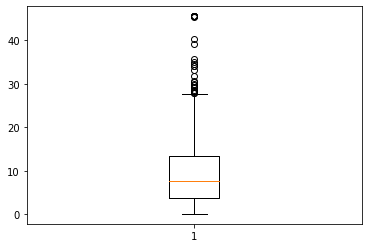

In [283]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.boxplot(df_train["if_var_78"])
plt.show()

In [289]:
# Create (more) balanced dataset
X_train = df_train[in_model]
y_train = df_train[output_var]
X_test = df_test[in_model]

smote_sampling_strategy = 0.5
under_sampling_strategy = 0.5

over = SMOTE(random_state=11,sampling_strategy=smote_sampling_strategy)
#under = RandomUnderSampler()#random_state=11, sampling_strategy=under_sampling_strategy)
steps = [('o', over)]#, ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train_sampled, y_train_sampled = pipeline.fit_resample(X_train, y_train)

# Count before and after sampling 
counter_before = Counter(y_train)
counter_after = Counter(y_train_sampled)
print(f"Classes before sampling: {counter_before}")
print(f"Classes after sampling: {counter_after}, output datasets: X_train_sampled,y_train_sampled")

Classes before sampling: Counter({0: 750, 1: 86})
Classes after sampling: Counter({0: 750, 1: 375}), output datasets: X_train_sampled,y_train_sampled


In [290]:
corr_table = X_train_sampled
corr_table["ob_target"] = y_train_sampled
corr = corr_table.corr(method="spearman")[["ob_target"]]# Calculates correlation matrix
corr.style.background_gradient(cmap='coolwarm') 
corr.sort_values(by="ob_target", ascending=False)

,ob_target
ob_target,1.000
if_var_68,0.216
if_var_79,0.173
if_var_69,0.118
ib_var_16,0.031
if_var_66,0.030
ib_var_20,0.028
icn_var_23,0.024
if_var_73,0.022
ib_var_17,0.007


In [291]:
# Define features to keep 
cut_off = 0.05
features_to_keep = corr[abs(corr["ob_target"])>=cut_off].T.columns.tolist()
features_to_keep.remove("ob_target")
print(f"Number of features to keep: {len(features_to_keep)} \nFeatures to keep: {features_to_keep}")

features_to_remove = corr[abs(corr["ob_target"])<cut_off].T.columns.tolist()

Number of features to keep: 66 
Features to keep: ['ib_var_1', 'ib_var_2', 'ib_var_4', 'ib_var_5', 'ib_var_6', 'ib_var_7', 'ib_var_8', 'ib_var_11', 'ib_var_13', 'ib_var_14', 'ib_var_18', 'ib_var_19', 'ib_var_21', 'icn_var_22', 'icn_var_24', 'ico_var_25', 'ico_var_26', 'ico_var_27', 'ico_var_28', 'ico_var_29', 'ico_var_30', 'ico_var_31', 'ico_var_32', 'ico_var_33', 'ico_var_34', 'ico_var_35', 'ico_var_36', 'ico_var_37', 'ico_var_38', 'ico_var_39', 'ico_var_40', 'ico_var_41', 'ico_var_42', 'ico_var_43', 'ico_var_44', 'ico_var_45', 'ico_var_46', 'ico_var_47', 'ico_var_48', 'ico_var_49', 'ico_var_50', 'ico_var_51', 'ico_var_52', 'ico_var_53', 'ico_var_54', 'ico_var_55', 'ico_var_56', 'ico_var_57', 'ico_var_58', 'ico_var_59', 'ico_var_60', 'ico_var_61', 'ico_var_62', 'ico_var_64', 'if_var_65', 'if_var_68', 'if_var_69', 'if_var_70', 'if_var_71', 'if_var_72', 'if_var_74', 'if_var_77', 'if_var_78', 'if_var_79', 'if_var_80', 'if_var_81']


In [292]:
# Remove features from X_train_sampled, y_train_sampled and X_test
X_train_samples_ex_features = X_train_sampled.drop(features_to_remove, axis=1).drop(columns=["ob_target"], axis=1)
X_test_ex_features = X_test.drop(features_to_remove, axis=1)

In [293]:
print ("STEP 3: DEVELOPING THE MODEL...")

X_train = X_train_samples_ex_features # Sampled, feature selection performed
X_test = X_test_ex_features           # Feature selection performed
y_train = y_train_sampled             # Sampled

clf = RandomForestClassifier(random_state=42)#, n_estimators=2000, max_depth=13, max_features="sqrt", min_samples_split=2)

fitted_model = clf.fit(X_train, y_train)
pred_train = fitted_model.predict_proba(X_train)[:,1]
pred_test  = fitted_model.predict_proba(X_test)[:,1]

STEP 3: DEVELOPING THE MODEL...


- max_depth = 15 n_estimators = 600: -> 0.46225242377471165 (Sampling ratio: 0.5, 0.5)
- max_depth = 13, n_estimators = 2000:  0.47304272682741977 (Sampling ratio: 0.5, 0.5) 
- max_depth = 13, n_estimators = 2000:  0.4725320936422701 (Sampling ratio: none defined)
- max_depth = 13, n_estimators = 2000:  0.4761411842993004 (SMOTE: none defined, no Undersampling)
- max_depth = 13, n_estimators = 2000:  0.47676041368219657 (SMOTE: 0.5, no Undersampling)
- max_depth = 13, n_estimators = 2000:  0.46822290409338363 (SMOTE: 0.7, no Undersampling)
- max_depth = 13, n_estimators = 2000:  0.45580827918927147 (SMOTE: 0.3, no Undersampling)
- max_depth = 13, n_estimators = 2000:  0.4883062690043345 (SMOTE: 0.5, no Undersampling) -> taking out only few variables (cutoff 0.05) BEST (better than cutoff at 0.1, 0.2 etc.)
- max_depth = 13, n_estimators = 2000:  0.4808177524746069 (SMOTE: 0.5, no Undersampling) -> keeping all variables

- no hyperparameters: gini = 0.4870400835497557 (SMOTE: 0.5, no Undersampling) -> taking out only few variables (cutoff 0.05) 


- change sampling to not defining ratio 0.45155338773925835
- change sampling to only oversampling (perfectly balanced classes) 0.45155338773925835
- same as previous but with n_estimators to 2000 (from 600): 0.45839725875470205
ExtraTree is not better

In [294]:
print ("STEP 4: ASSESSING THE MODEL...")
# CALCULATING GINI PERFORMANCE ON DEVELOPMENT SAMPLE
from sklearn.metrics import roc_auc_score
gini_score = 2*roc_auc_score(y_train, pred_train)-1
print ("GINI DEVELOPMENT=", gini_score)

STEP 4: ASSESSING THE MODEL...
GINI DEVELOPMENT= 1.0


In [295]:
print ("STEP 5: SUBMITTING THE RESULTS... DO NOT CHANGE THIS PART!")
import requests
from requests.auth import HTTPBasicAuth
df_test['pred'] = pred_test
df_test['id'] = df_test.iloc[:,0]
df_test_tosend = df_test[['id','pred']]

filename = "df_test_tosend.csv"
df_test_tosend.to_csv(filename, sep=',')
url = 'http://manoelutad.pythonanywhere.com/uploadpredictions/6aQ6IxU7Va'
files = {'file': (filename, open(filename, 'rb')),
         'ipynbcode': ('6aQ6IxU7Va.ipynb', open('6aQ6IxU7Va.ipynb', 'rb'))}


#rsub = requests.post(url, files=files)
rsub = requests.post(url, files=files, auth=HTTPBasicAuth("Martina W", "sha256$cOstKpBh$6e846fc345ae8135795099a8b8e06db338ea33f13c3624f482b3d9bb50582bcb"))
resp_str = str(rsub.text)
print ("RESULT SUBMISSION: ", resp_str)

STEP 5: SUBMITTING THE RESULTS... DO NOT CHANGE THIS PART!
RESULT SUBMISSION:  Competition / competición: 6aQ6IxU7Va - gini = 0.45963340696309585


### Using CV and other methods to make the model more robust 

In [304]:
# Feature selection 
X_train = df_train[in_model]
y_train = df_train[output_var]
X_test = df_test[in_model]

# Remove features from X_train_sampled, y_train_sampled and X_test
X_train_ex_features = X_train.drop(features_to_remove, axis=1)
X_test_ex_features = X_test.drop(features_to_remove, axis=1)

In [645]:
# Create (more) balanced dataset
X_train = X_train_ex_features
y_train = df_train[output_var]
X_test = X_test_ex_features

In [648]:
X_train_ex_features.columns

Index(['ib_var_1', 'ib_var_2', 'ib_var_4', 'ib_var_5', 'ib_var_6', 'ib_var_7',
       'ib_var_8', 'ib_var_11', 'ib_var_13', 'ib_var_14', 'ib_var_18',
       'ib_var_19', 'ib_var_21', 'icn_var_22', 'icn_var_24', 'ico_var_25',
       'ico_var_26', 'ico_var_27', 'ico_var_28', 'ico_var_29', 'ico_var_30',
       'ico_var_31', 'ico_var_32', 'ico_var_33', 'ico_var_34', 'ico_var_35',
       'ico_var_36', 'ico_var_37', 'ico_var_38', 'ico_var_39', 'ico_var_40',
       'ico_var_41', 'ico_var_42', 'ico_var_43', 'ico_var_44', 'ico_var_45',
       'ico_var_46', 'ico_var_47', 'ico_var_48', 'ico_var_49', 'ico_var_50',
       'ico_var_51', 'ico_var_52', 'ico_var_53', 'ico_var_54', 'ico_var_55',
       'ico_var_56', 'ico_var_57', 'ico_var_58', 'ico_var_59', 'ico_var_60',
       'ico_var_61', 'ico_var_62', 'ico_var_64', 'if_var_65', 'if_var_68',
       'if_var_69', 'if_var_70', 'if_var_71', 'if_var_72', 'if_var_74',
       'if_var_77', 'if_var_78', 'if_var_79', 'if_var_80', 'if_var_81'],
      dtype='obj

In [782]:
print ("STEP 3: DEVELOPING THE MODEL...")

from imblearn.over_sampling import SMOTENC, BorderlineSMOTE, ADASYN

# Create (more) balanced dataset
X_train = X_train_ex_features
y_train = df_train[output_var]
X_test = X_test_ex_features


smote_sampling_strategy = 0.5
under_sampling_strategy = 0.5

pipeline = imbpipeline(steps = [['smote', SMOTENC(sampling_strategy=smote_sampling_strategy, k_neighbors=5, categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])],
                                ['under', RandomUnderSampler(sampling_strategy=under_sampling_strategy)], 
                                ['classifier', RandomForestClassifier()]])

cv = StratifiedKFold(n_splits=10,shuffle=True)

#cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)

# Get all possible parameters with: pipeline.get_params()
param_grid = {"classifier__n_estimators": [1100],    # default: 100
              "classifier__min_samples_split": [3], #[2,4,6],          # default: 2 
              #"classifier__min_samples_leaf": [1,3,5],             # default: 1
              "classifier__max_features": ["log2"], #,"auto","log2"],       # default: auto, best log2
              "classifier__bootstrap": [False], #,False],
              "classifier__max_depth": [15],
              "classifier__verbose": [2],
              "classifier__max_samples": [0.9],
            
              }

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=cv,
                           n_jobs=-1)

fitted_model = grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
pred_train = fitted_model.predict_proba(X_train)[:,1] 
pred_test  = fitted_model.predict_proba(X_test)[:,1] 

STEP 3: DEVELOPING THE MODEL...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1100
building tree 2 of 1100
building tree 3 of 1100
building tree 4 of 1100
building tree 5 of 1100
building tree 6 of 1100
building tree 7 of 1100
building tree 8 of 1100
building tree 9 of 1100
building tree 10 of 1100
building tree 11 of 1100
building tree 12 of 1100
building tree 13 of 1100
building tree 14 of 1100
building tree 15 of 1100
building tree 16 of 1100
building tree 17 of 1100
building tree 18 of 1100
building tree 19 of 1100
building tree 20 of 1100
building tree 21 of 1100
building tree 22 of 1100
building tree 23 of 1100
building tree 24 of 1100
building tree 25 of 1100
building tree 26 of 1100
building tree 27 of 1100
building tree 28 of 1100
building tree 29 of 1100
building tree 30 of 1100
building tree 31 of 1100
building tree 32 of 1100
building tree 33 of 1100
building tree 34 of 1100
building tree 35 of 1100
building tree 36 of 1100
building tree 37 of 1100
building tree 38 of 1100
building tree 39 of 1100
building tree 40 of 1100
building 

building tree 342 of 1100
building tree 343 of 1100
building tree 344 of 1100
building tree 345 of 1100
building tree 346 of 1100
building tree 347 of 1100
building tree 348 of 1100
building tree 349 of 1100
building tree 350 of 1100
building tree 351 of 1100
building tree 352 of 1100
building tree 353 of 1100
building tree 354 of 1100
building tree 355 of 1100
building tree 356 of 1100
building tree 357 of 1100
building tree 358 of 1100
building tree 359 of 1100
building tree 360 of 1100
building tree 361 of 1100
building tree 362 of 1100
building tree 363 of 1100
building tree 364 of 1100
building tree 365 of 1100
building tree 366 of 1100
building tree 367 of 1100
building tree 368 of 1100
building tree 369 of 1100
building tree 370 of 1100
building tree 371 of 1100
building tree 372 of 1100
building tree 373 of 1100
building tree 374 of 1100
building tree 375 of 1100
building tree 376 of 1100
building tree 377 of 1100
building tree 378 of 1100
building tree 379 of 1100
building tre

building tree 682 of 1100
building tree 683 of 1100
building tree 684 of 1100
building tree 685 of 1100
building tree 686 of 1100
building tree 687 of 1100
building tree 688 of 1100
building tree 689 of 1100
building tree 690 of 1100
building tree 691 of 1100
building tree 692 of 1100
building tree 693 of 1100
building tree 694 of 1100
building tree 695 of 1100
building tree 696 of 1100
building tree 697 of 1100
building tree 698 of 1100
building tree 699 of 1100
building tree 700 of 1100
building tree 701 of 1100
building tree 702 of 1100
building tree 703 of 1100
building tree 704 of 1100
building tree 705 of 1100
building tree 706 of 1100
building tree 707 of 1100
building tree 708 of 1100
building tree 709 of 1100
building tree 710 of 1100
building tree 711 of 1100
building tree 712 of 1100
building tree 713 of 1100
building tree 714 of 1100
building tree 715 of 1100
building tree 716 of 1100
building tree 717 of 1100
building tree 718 of 1100
building tree 719 of 1100
building tre

building tree 1027 of 1100
building tree 1028 of 1100
building tree 1029 of 1100
building tree 1030 of 1100
building tree 1031 of 1100
building tree 1032 of 1100
building tree 1033 of 1100
building tree 1034 of 1100
building tree 1035 of 1100
building tree 1036 of 1100
building tree 1037 of 1100
building tree 1038 of 1100
building tree 1039 of 1100
building tree 1040 of 1100
building tree 1041 of 1100
building tree 1042 of 1100
building tree 1043 of 1100
building tree 1044 of 1100
building tree 1045 of 1100
building tree 1046 of 1100
building tree 1047 of 1100
building tree 1048 of 1100
building tree 1049 of 1100
building tree 1050 of 1100
building tree 1051 of 1100
building tree 1052 of 1100
building tree 1053 of 1100
building tree 1054 of 1100
building tree 1055 of 1100
building tree 1056 of 1100
building tree 1057 of 1100
building tree 1058 of 1100
building tree 1059 of 1100
building tree 1060 of 1100
building tree 1061 of 1100
building tree 1062 of 1100
building tree 1063 of 1100
b

[Parallel(n_jobs=1)]: Done 1100 out of 1100 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1100 out of 1100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1100 out of 1100 | elapsed:    1.0s finished


- max_depth = 13, n_estimators = 2000, (SMOTE: 0.5, no Undersampling), FeatSel(cut-off: 0.05): 0.491023484505402
- max_depth = 13, n_estimators = 600, (SMOTE: 0.5, no Undersampling), FeatSel(cut-off: 0.05): 0.4854411778297396

- [['smote', SMOTENC(sampling_strategy=smote_sampling_strategy, k_neighbors=4, categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])], -> 3 or 5 appear to work slightly better
- BorderlineSMOTE(sampling_strategy=smote_sampling_strategy, k_neighbors=5)

In [783]:
print ("STEP 4: ASSESSING THE MODEL...")
# CALCULATING GINI PERFORMANCE ON DEVELOPMENT SAMPLE
from sklearn.metrics import roc_auc_score
gini_score = 2*roc_auc_score(y_train, pred_train)-1
print ("GINI DEVELOPMENT=", gini_score)

STEP 4: ASSESSING THE MODEL...
GINI DEVELOPMENT= 1.0


In [786]:
print ("STEP 5: SUBMITTING THE RESULTS... DO NOT CHANGE THIS PART!")
import requests
from requests.auth import HTTPBasicAuth
df_test['pred'] = pred_test
df_test['id'] = df_test.iloc[:,0]
df_test_tosend = df_test[['id','pred']]

filename = "df_test_tosend.csv"
df_test_tosend.to_csv(filename, sep=',')
url = 'http://manoelutad.pythonanywhere.com/uploadpredictions/6aQ6IxU7Va'
files = {'file': (filename, open(filename, 'rb')),
         'ipynbcode': ('6aQ6IxU7Va.ipynb', open('6aQ6IxU7Va.ipynb', 'rb'))}


#rsub = requests.post(url, files=files)
rsub = requests.post(url, files=files, auth=HTTPBasicAuth("Martina W", "sha256$cOstKpBh$6e846fc345ae8135795099a8b8e06db338ea33f13c3624f482b3d9bb50582bcb"))
resp_str = str(rsub.text)
print ("RESULT SUBMISSION: ", resp_str)

STEP 5: SUBMITTING THE RESULTS... DO NOT CHANGE THIS PART!
RESULT SUBMISSION:  Competition / competición: 6aQ6IxU7Va - gini = 0.5028674017319938


In [750]:
#columns = ["run","param_grid","gini_score","resp_str"]
#df_models=pd.DataFrame(columns=columns)
pd.set_option('display.max_colwidth', None)

resp_str_short = resp_str[-19:]

i = df_models["run"].max()+1
df_models = df_models.append({'run': i, "param_grid": param_grid, "gini_score": gini_score, "resp_str": resp_str_short}, ignore_index=True)
df_models.sort_values(by="resp_str", ascending=False)#.head(4)

,run,param_grid,gini_score,resp_str
22,22,"{'classifier__n_estimators': [1100], 'classifier__min_samples_split': [2], 'classifier__max_features': ['sqrt'], 'classifier__bootstrap': [False], 'classifier__max_depth': [13], 'classifier__verbose': [2], 'classifier__max_samples': [0.9]}",1.000,idos espera un poco
0,1,"{'classifier__n_estimators': [1000], 'classifier__min_samples_split': [2], 'classifier__max_features': ['sqrt'], 'classifier__bootstrap': [True], 'classifier__max_depth': [13], 'classifier__verbose': [2], 'classifier__max_samples': [0.1]}",0.839,Competition / competición: 6aQ6IxU7Va - gini = 0.34146688047024454
3,3,"{'classifier__n_estimators': [1000], 'classifier__min_samples_split': [2], 'classifier__max_features': ['sqrt'], 'classifier__bootstrap': [True], 'classifier__max_depth': [13], 'classifier__verbose': [2], 'classifier__max_samples': [0.9]}",1.000,0.4953927485466596
12,12,"{'classifier__n_estimators': [900], 'classifier__min_samples_split': [2], 'classifier__max_features': ['sqrt'], 'classifier__bootstrap': [True], 'classifier__max_depth': [13], 'classifier__verbose': [2], 'classifier__max_samples': [0.9]}",1.000,0.49480817752474615
8,8,"{'classifier__n_estimators': [600], 'classifier__min_samples_split': [2], 'classifier__max_features': ['sqrt'], 'classifier__bootstrap': [True], 'classifier__max_depth': [13], 'classifier__verbose': [2], 'classifier__max_samples': [0.9]}",1.000,0.49422822761763063
9,9,"{'classifier__n_estimators': [600], 'classifier__min_samples_split': [2], 'classifier__max_features': ['sqrt'], 'classifier__bootstrap': [True], 'classifier__max_depth': [13], 'classifier__verbose': [2], 'classifier__max_samples': [0.9]}",1.000,0.49422822761763063
6,6,"{'classifier__n_estimators': [2000], 'classifier__min_samples_split': [2], 'classifier__max_features': ['sqrt'], 'classifier__bootstrap': [True], 'classifier__max_depth': [13], 'classifier__verbose': [2], 'classifier__max_samples': [0.9]}",1.000,0.4920609247774934
5,5,"{'classifier__n_estimators': [1000], 'classifier__min_samples_split': [2], 'classifier__max_features': ['sqrt'], 'classifier__bootstrap': [True], 'classifier__max_depth': [13], 'classifier__verbose': [2], 'classifier__max_samples': [0.99]}",1.000,0.4898774480355641
4,4,"{'classifier__n_estimators': [1000], 'classifier__min_samples_split': [2], 'classifier__max_features': ['sqrt'], 'classifier__bootstrap': [True], 'classifier__max_depth': [13], 'classifier__verbose': [2], 'classifier__max_samples': [0.7]}",1.000,0.4840710172922118
7,7,"{'classifier__n_estimators': [600], 'classifier__min_samples_split': [2], 'classifier__max_features': ['sqrt'], 'classifier__bootstrap': [True], 'classifier__max_depth': [13], 'classifier__verbose': [2], 'classifier__max_samples': [0.9]}",1.000,.49422822761763063


- n_estimators: 1000 (vs 600 or 2000); 900>800>600 and 1000>900>1100
- max_samples: 0.9 (0.99 not better, 0.1 very bad, 0.7 or 0.8 also not better) and better as not using it
- Bootstrap: False with n_estimators=1000, max_samples=0.9

In [391]:
##########################################################################################################

### Using Voting algorithm

In [587]:
# group / ensemble of models

X_train = df_train[in_model]
y_train = df_train[output_var]
X_test = df_test[in_model]

estimator = []
#estimator.append(('LR', 
#                  LogisticRegression(solver ='lbfgs',
#                                     max_iter = 200)))
estimator.append(('RF', RandomForestClassifier(n_estimators=1100, min_samples_split=3, max_features="log2",
                                                  bootstrap="False", max_depth=15,max_samples=0.9, class_weight="balanced") 
                                                 ))
estimator.append(('ET', ExtraTreesClassifier(n_estimators=1100, min_samples_split=3, max_features="log2",
                                                  bootstrap="False", max_depth=15,max_samples=0.9, class_weight="balanced")))
  
# Voting Classifier with hard voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')

#vot_hard.fit(X_train, y_train)
#y_pred = vot_hard.predict(X_test)

fitted_model = vot_soft.fit(X_train, y_train)
pred_train = fitted_model.predict_proba(X_train)[:,1]
pred_test  = fitted_model.predict_proba(X_test)[:,1]
  
# using accuracy_score metric to predict accuracy
#gini_score = 2*roc_auc_score(y_train, pred_train)-1
#roc_auc_score = roc_auc_score(y_train, pred_train)
print("Hard Voting Score % d" % gini_score)
print("Hard Voting Score % d" % roc_auc_score)
  


Hard Voting Score  1
Hard Voting Score  1


In [591]:
print ("STEP 5: SUBMITTING THE RESULTS... DO NOT CHANGE THIS PART!")
import requests
from requests.auth import HTTPBasicAuth
df_test['pred'] = pred_test
df_test['id'] = df_test.iloc[:,0]
df_test_tosend = df_test[['id','pred']]

filename = "df_test_tosend.csv"
df_test_tosend.to_csv(filename, sep=',')
url = 'http://manoelutad.pythonanywhere.com/uploadpredictions/6aQ6IxU7Va'
files = {'file': (filename, open(filename, 'rb')),
         'ipynbcode': ('6aQ6IxU7Va.ipynb', open('6aQ6IxU7Va.ipynb', 'rb'))}


#rsub = requests.post(url, files=files)
rsub = requests.post(url, files=files, auth=HTTPBasicAuth("Martina W", "sha256$cOstKpBh$6e846fc345ae8135795099a8b8e06db338ea33f13c3624f482b3d9bb50582bcb"))
resp_str = str(rsub.text)
print ("RESULT SUBMISSION: ", resp_str)

STEP 5: SUBMITTING THE RESULTS... DO NOT CHANGE THIS PART!
RESULT SUBMISSION:  Competition / competición: 6aQ6IxU7Va - gini = 0.50650537435651


- 2 classifiers, Trees with balanced weights, X_train, y_train (not sampled): 0.4976108836495716
- 3 classifiers (incl. LogReg - lbgfs, no penalty), Trees with balanced weights, X_train, y_train (not sampled): 0.4985235538221242
- 3 classifiers (incl. LogReg - lbfgs + l2 penalty), Trees with balanced weights, X_train, y_train (not sampled):0.4922342165824085 
- 3 classifiers (incl. LogReg - lbgfs, no penalty, class balanced), Trees with balanced weights, X_train, y_train (not sampled): 0.45776301074871295
- 3 classifiers (incl. LogReg - lbgfs, no penalty),  X_train, y_train (not sampled)- nothing balanced: 0.47930202682095
- 3 classifiers (incl. LogReg - lbgfs, no penalty),  X,y etc -> sampled & ex-features, no add. balancing :0.418097671882365
- 2 classifiers (Trees),  X,y etc -> sampled & ex-features, no add. balancing :0.4654271296407546

In [ ]:
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_test)
  
# using accuracy_score
score = roc_auc_score(y_test, y_pred)
print("Soft Voting Score % d" % score)

In [510]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

#clf = LogisticRegression(random_state=42, solver='lbfgs')
#clf = DecisionTreeClassifier(random_state=42, max_depth=4)
#clf = RandomForestClassifier(random_state=42, max_depth=5)
#clf = ExtraTreesClassifier(random_state=42, max_depth=4)

models = [('lr',LogisticRegression()),('rf',RandomForestClassifier(param_grid_rf))]
ensemble = VotingClassifier(estimators=models, voting="soft") #"hard"



# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [56]:
print ("STEP 3: DEVELOPING THE MODEL...")
X_train = df_train[in_model]
y_train = df_train[output_var]
X_test = df_test[in_model]


from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs')
fitted_model = clf.fit(X_train, y_train)
pred_train = fitted_model.predict_proba(X_train)[:,1]
pred_test  = fitted_model.predict_proba(X_test)[:,1]


STEP 3: DEVELOPING THE MODEL...


C:\Users\Tini\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
print ("STEP 4: ASSESSING THE MODEL...")
# CALCULATING GINI PERFORMANCE ON DEVELOPMENT SAMPLE
from sklearn.metrics import roc_auc_score
gini_score = 2*roc_auc_score(y_train, pred_train)-1
print ("GINI DEVELOPMENT=", gini_score)


STEP 4: ASSESSING THE MODEL...
GINI DEVELOPMENT= 0.9999335742374322


WHAT IS GINI?
* watch this video for reference: https://youtu.be/MiBUBVUC8kE


In [117]:
print ("STEP 5: SUBMITTING THE RESULTS... DO NOT CHANGE THIS PART!")
import requests
from requests.auth import HTTPBasicAuth
df_test['pred'] = pred_test
df_test['id'] = df_test.iloc[:,0]
df_test_tosend = df_test[['id','pred']]

filename = "df_test_tosend.csv"
df_test_tosend.to_csv(filename, sep=',')
url = 'http://manoelutad.pythonanywhere.com/uploadpredictions/6aQ6IxU7Va'
files = {'file': (filename, open(filename, 'rb')),
         'ipynbcode': ('6aQ6IxU7Va.ipynb', open('6aQ6IxU7Va.ipynb', 'rb'))}


#rsub = requests.post(url, files=files)
rsub = requests.post(url, files=files, auth=HTTPBasicAuth("Martina W", "sha256$cOstKpBh$6e846fc345ae8135795099a8b8e06db338ea33f13c3624f482b3d9bb50582bcb"))
resp_str = str(rsub.text)
print ("RESULT SUBMISSION: ", resp_str)

STEP 5: SUBMITTING THE RESULTS... DO NOT CHANGE THIS PART!
RESULT SUBMISSION:  Competition / competición: 6aQ6IxU7Va - gini = 0.46225242377471165
